In [1]:
# Let's begin this tutorial by importing the modules we will need

get_ipython().magic(u'matplotlib inline')
import xml.etree.ElementTree as ET
import pandas as pd
from pandas import Series, DataFrame 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Now let's read the XML file and set out root node

data  = 'C:\Users\Javi\Desktop\Coursera\R\Data Sets\playground.opta.net.xml'
tree = ET.parse(data)
root = tree.getroot()

with open(data, 'rt') as f:
    tree = ET.parse(f)

# Here I'm printing the xml object, which is the whole document itself
print tree

In [3]:
# Let's take a look at the tags we have, they will come in handy later 

games = root

game = root[0]

event = root[0][0]

q = root[0][0][0]

print '''
        The root tag is %s
        The 1st child is the %s tag
        The 2nd child is the %s tag
        The 3rd child is the %s tag
        ''' %(games.tag, game.tag, event.tag, q.tag)



        The root tag is Games
        The 1st child is the Game tag
        The 2nd child is the Event tag
        The 3rd child is the Q tag
        


In [4]:
# Ok so now we know how our document is structured, let's find the length of elements inside each node
print '''
        The root node has %d game
        The Game node has %d events
        The Event node has %d qualifiers
        The Q node has %d elements
        ''' %(len(games), len(game), len(event), len(q))


        The root node has 1 game
        The Game node has 1562 events
        The Event node has 5 qualifiers
        The Q node has 0 elements
        


In [5]:
# We see that Q contains no elements, perhaps this might be the last element in the tre
# Also we see that we have 1562 events in the game! This looks like a lot of data
# Let's explore the data

# We can use dictionary functions on the nodes 
# We can get the keys for every tag
print ''' Games tag keys: %s 
            Game tag keys: %s
            Event tag keys: %s
            Q tag keys: %s
        '''%(games.keys(), game.keys(), event.keys(), q.keys())

 Games tag keys: ['timestamp'] 
            Game tag keys: ['game_date', 'competition_id', 'away_team_name', 'competition_name', 'matchday', 'season_name', 'season_id', 'home_team_id', 'away_team_id', 'period_1_start', 'period_2_start', 'id', 'home_team_name']
            Event tag keys: ['min', 'event_id', 'timestamp', 'type_id', 'period_id', 'team_id', 'last_modified', 'sec', 'y', 'x', 'outcome', 'id']
            Q tag keys: ['qualifier_id', 'id', 'value']
        


In [6]:
# One thing you might have noticed from this data it might contain attributes
print games.attrib
print game.attrib

# Do you notice something? YES! The keys above are name of the attributes for each tag
# This specific document contains all the data in the attributes of the nodes!

{'timestamp': '2013-03-28T12:13:40'}
{'game_date': '2007-08-12T13:00:00', 'competition_id': '87', 'away_team_name': 'TuS Koblenz', 'competition_name': 'German Bundesliga Zwei', 'matchday': '1', 'season_name': 'Season 2007/2008', 'season_id': '8', 'home_team_id': '810', 'away_team_id': '2012', 'period_1_start': '2007-08-12T13:00:19', 'period_2_start': '2007-08-12T14:02:22', 'id': '131897', 'home_team_name': '1. FSV Mainz 05'}


In [7]:
# You might be asking yourself how can we parse the information contained in the attributes
# We can use the .iter function, which let us iterate through the XML tree and find a specific element

#Let's get the tag and attributes of the root node
# We are going to use the .tag and .attribute functions 
for node in tree.iter('Games'):
    print node.tag, node.attrib

Games {'timestamp': '2013-03-28T12:13:40'}


In [8]:
# Let's do it for the rest of the tags

for node in tree.iter('Game'):
    print node.tag, node.attrib

Game {'game_date': '2007-08-12T13:00:00', 'competition_id': '87', 'away_team_name': 'TuS Koblenz', 'competition_name': 'German Bundesliga Zwei', 'matchday': '1', 'season_name': 'Season 2007/2008', 'season_id': '8', 'home_team_id': '810', 'away_team_id': '2012', 'period_1_start': '2007-08-12T13:00:19', 'period_2_start': '2007-08-12T14:02:22', 'id': '131897', 'home_team_name': '1. FSV Mainz 05'}


In [9]:
# Let's play a little bit with the Events, notice that I put everything inside a list to avoid priting all 1562 events
x = [(node.tag, node.attrib) for node in tree.iter('Event')]

print 'First event'
print x[0]
print 
print 'Last event'
print x[len(x) - 1]

First event
('Event', {'min': '0', 'event_id': '1', 'timestamp': '2007-08-12T12:03:39.764', 'type_id': '34', 'period_id': '16', 'team_id': '2012', 'last_modified': '2007-08-12T13:11:38', 'sec': '0', 'y': '0.0', 'x': '0.0', 'outcome': '1', 'id': '1206331480'})

Last event
('Event', {'min': '0', 'event_id': '841', 'timestamp': '2007-08-12T14:49:39.902', 'type_id': '37', 'period_id': '14', 'team_id': '2012', 'last_modified': '2007-08-12T14:49:40', 'sec': '0', 'y': '0.0', 'x': '0.0', 'outcome': '1', 'id': '1344286221'})


In [10]:
# You can print all the events to the console 
for node in tree.iter('Event'):
    print node.tag, node.attrib
# This is messy however

Event {'min': '0', 'event_id': '1', 'timestamp': '2007-08-12T12:03:39.764', 'type_id': '34', 'period_id': '16', 'team_id': '2012', 'last_modified': '2007-08-12T13:11:38', 'sec': '0', 'y': '0.0', 'x': '0.0', 'outcome': '1', 'id': '1206331480'}
Event {'min': '0', 'event_id': '1', 'timestamp': '2007-08-12T12:07:00.863', 'type_id': '34', 'period_id': '16', 'team_id': '810', 'last_modified': '2007-08-12T12:57:47', 'sec': '0', 'y': '0.0', 'x': '0.0', 'outcome': '1', 'id': '1507050900'}
Event {'min': '0', 'event_id': '2', 'timestamp': '2007-08-12T13:00:18.914', 'type_id': '32', 'period_id': '1', 'team_id': '2012', 'last_modified': '2007-08-12T13:00:23', 'sec': '0', 'y': '0.0', 'x': '0.0', 'outcome': '1', 'id': '768970874'}
Event {'min': '0', 'event_id': '2', 'timestamp': '2007-08-12T13:00:19.312', 'type_id': '32', 'period_id': '1', 'team_id': '810', 'last_modified': '2007-08-12T13:00:18', 'sec': '0', 'y': '0.0', 'x': '0.0', 'outcome': '1', 'id': '1442548'}
Event {'min': '0', 'event_id': '3', 

In [11]:
# If you haven't figured it out we can also get the qualifiers
for node in tree.iter('Q'):
    print node.tag, node.attrib

Q {'qualifier_id': '30', 'id': '1665863226', 'value': '14056, 20779, 9895, 17839, 21104, 17561, 5064, 40430, 8987, 12888, 26741, 4762, 25249, 42663, 37187, 37583, 17860, 25183'}
Q {'qualifier_id': '131', 'id': '1079911436', 'value': '1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 0, 0, 0, 0, 0, 0'}
Q {'qualifier_id': '130', 'id': '602587765', 'value': '4'}
Q {'qualifier_id': '44', 'id': '2010117527', 'value': '1, 2, 2, 3, 2, 2, 3, 3, 4, 2, 4, 5, 5, 5, 5, 5, 5, 5'}
Q {'qualifier_id': '59', 'id': '2050054303', 'value': '1, 8, 3, 21, 24, 5, 10, 13, 11, 22, 15, 2, 4, 6, 7, 17, 27, 33'}
Q {'qualifier_id': '130', 'id': '229885110', 'value': '2'}
Q {'qualifier_id': '30', 'id': '1807058611', 'value': '18193, 18257, 19490, 20379, 41452, 18196, 6627, 20856, 44739, 20378, 11827, 20486, 33057, 20485, 37614, 18195, 19507, 46033'}
Q {'qualifier_id': '59', 'id': '1996488057', 'value': '1, 6, 5, 13, 28, 4, 21, 27, 8, 11, 7, 3, 9, 24, 25, 29, 31, 33'}
Q {'qualifier_id': '131', 'id': '1307474428', 'value': '1, 2

In [12]:
# We will now start parsing
# Pay close attention as I am going to create a function to do so
# We should begin by creating a list for every attribute inside each tag. We will append the attribute information to its corresponding list!

game_date =[]; competition_id =[]; away_team_name =[]; competition_name =[];
matchday =[]; season_name =[]; season_id =[]; home_team_id =[];
away_team_id =[]; period_1_start =[]; period_2_start =[]; id_game =[]; home_team_name =[]

In [13]:
# Let me create the parsing function

def Game():
    for node in tree.iter('Game'):
        'We will make use of the get method for dictionaries here.'
        game_date.append(node.attrib.get('game_date'))
        competition_id.append(node.attrib.get('competition_id'))
        away_team_name.append(node.attrib.get('away_team_name'))
        home_team_name.append(node.attrib.get('home_team_name'))
        competition_name.append(node.attrib.get('competition_name'))
        matchday.append(node.attrib.get('matchday'))
        season_name.append(node.attrib.get('season_name'))
        season_id.append(node.attrib.get('season_id'))
        home_team_id.append(node.attrib.get('home_team_id'))
        away_team_id.append(node.attrib.get('away_team_id'))
        period_1_start.append(node.attrib.get('period_1_start'))
        period_2_start.append(node.attrib.get('period_2_start'))
        id_game.append(node.attrib.get('id'))
        
# So the function will append every attribute inside the tag keys we are looking in

In [14]:
# So the function here has parsed the information we needed
Game()

In [15]:
# Let's verify if the data was parsed correctly
game_date, competition_id, away_team_name, competition_name

(['2007-08-12T13:00:00'], ['87'], ['TuS Koblenz'], ['German Bundesliga Zwei'])

In [16]:
# We have parsed the data the hard and long way! Let's do it with just a couple of lines of code!
# We can iterate through the list and key names

In [17]:
# Let's create an array in which we can iterate over
game_list = [game_date, competition_id,  away_team_name, competition_name, matchday,
             season_name, season_id, home_team_id, away_team_id, period_1_start,
             period_2_start, id_game, home_team_name]

# The keys will return a list of strings that can be used when the get() method is passed
game_keys = game.keys()

In [18]:
# Here is the function
def xx(tag, List, keys):
    for node in tree.iter(tag):
        for element, key in zip(List, keys):
            element.append(node.attrib.get(key))
           # print element,key
            
xx('Game', game_list, game_keys)

In [19]:
print game_keys

['game_date', 'competition_id', 'away_team_name', 'competition_name', 'matchday', 'season_name', 'season_id', 'home_team_id', 'away_team_id', 'period_1_start', 'period_2_start', 'id', 'home_team_name']


In [20]:
# We can create a data frame using pandas. Let's store tge data we just parsed

# Let's create the Game data frame
Game_dict ={'game_date': game_date, 'competition_id': competition_id, 'away_team_name': away_team_name,
            'competition_name': competition_name, 'matchday': matchday, 'season_name': season_name,
            'season_id': season_id, 'home_team_id': home_team_id, 'away_team_id': away_team_id,
            'period_1_start': period_1_start, 'period_2_start': period_2_start, 'id': id_game, 'home_team_name': home_team_name}

In [21]:
Game_frame = DataFrame(Game_dict, columns = game_keys)

Game_frame

,game_date,competition_id,away_team_name,competition_name,matchday,season_name,season_id,home_team_id,away_team_id,period_1_start,period_2_start,id,home_team_name
0,2007-08-12T13:00:00,87,TuS Koblenz,German Bundesliga Zwei,1,Season 2007/2008,8,810,2012,2007-08-12T13:00:19,2007-08-12T14:02:22,131897,1. FSV Mainz 05
1,2007-08-12T13:00:00,87,TuS Koblenz,German Bundesliga Zwei,1,Season 2007/2008,8,810,2012,2007-08-12T13:00:19,2007-08-12T14:02:22,131897,1. FSV Mainz 05


In [22]:
# So now that we know the procedure for the Game tag, we can proceed to do it for the other tags!
# Events 
# first we begin with the lists

minute =[]; event_id =[]; timestamp =[]; type_id =[]; period_id =[]
player_id =[]; team_id =[]; last_modified =[]; sec =[]; y =[]; x =[]; outcome =[]; id_event =[]
assist =[]; keypass =[]

In [23]:
# let's create the array
event_list = [minute, event_id, timestamp, type_id, period_id, team_id, last_modified,
              sec, y, x, outcome, id_event, player_id, assist, keypass]

['min', 'event_id', 'timestamp', 'type_id', 'period_id', 'team_id', 'last_modified',
 'sec', 'y', 'x', 'outcome', 'id', 'player_id', 'assist', 'keypass']

event_keys = event.keys()
event_keys.append('player_id')
event_keys.append('assist')
event_keys.append('keypass')

In [24]:
print event_keys

['min', 'event_id', 'timestamp', 'type_id', 'period_id', 'team_id', 'last_modified', 'sec', 'y', 'x', 'outcome', 'id', 'player_id', 'assist', 'keypass']


In [25]:
# The parser function
           
xx('Event', event_list, event_keys)

In [26]:
names = ['min', 'event_id', 'timestamp', 'type_id', 'period_id', 'team_id',
         'last_modified', 'sec', 'y', 'x', 'outcome', 'id', 'player_id', 'assist', 'keypass']


Event_dict = {'min' :minute, 'event_id': event_id, 'timestamp': timestamp, 'type_id': type_id, 'period_id':period_id, 
              'team_id':team_id, 'last_modified': last_modified, 'sec': sec, 'y': y, 'x': x,
              'outcome': outcome, 'id': id_event, 'player_id': player_id, 'assist': assist, 'keypass': keypass}


In [27]:
Event_frame = DataFrame(Event_dict, columns = names)
Event_frame.head()

,min,event_id,timestamp,type_id,period_id,team_id,last_modified,sec,y,x,outcome,id,player_id,assist,keypass
0,0,1,2007-08-12T12:03:39.764,34,16,2012,2007-08-12T13:11:38,0,0.0,0.0,1,1206331480,None,None,None
1,0,1,2007-08-12T12:07:00.863,34,16,810,2007-08-12T12:57:47,0,0.0,0.0,1,1507050900,None,None,None
2,0,2,2007-08-12T13:00:18.914,32,1,2012,2007-08-12T13:00:23,0,0.0,0.0,1,768970874,None,None,None
3,0,2,2007-08-12T13:00:19.312,32,1,810,2007-08-12T13:00:18,0,0.0,0.0,1,1442548,None,None,None
4,0,3,2007-08-12T13:00:22.296,1,1,810,2007-08-12T13:00:23,2,49.7,49.5,1,719864701,20378,None,None


In [28]:
# Make sure to connvert the None's or NA's into a numeric variable and describe it
# Here since we know the assist and the keypass columns have a unique value of 1 
print Event_frame.keypass.describe()
print Event_frame.assist.describe()

# Let's use  function that will return the desired rows!
# This will help us analyze the assists and the keypasses later
 
keypass = Event_frame[Event_frame.keypass.notnull()].head()

count     12
unique     1
top        1
freq      12
Name: keypass, dtype: object
count     3
unique    1
top       1
freq      3
Name: assist, dtype: object


In [29]:
# Simiarly we can do it for the assist column and then we can join the keypasses and the assits dataframes
assist = Event_frame[Event_frame.assist.notnull()]

In [30]:
# Now for the qualifiers!
qualifier_id =[]
id_Q =[]
value=[]
event_id =[]
player_id =[]
team_id =[]
type_id =[]

In [31]:
q_list = [qualifier_id, id_Q, value, event_id, player_id, team_id, type_id]
q_keys = q.keys()
q_keys.append('event_id')
q_keys.append('player_id')
q_keys.append('team_id')
q_keys.append('type_id')

In [32]:
q_keys

['qualifier_id', 'id', 'value', 'event_id', 'player_id', 'team_id', 'type_id']

In [33]:
# So here the way our data is structured is a bit tricky
# See, our Event node contains event qualifiers, which tell us the details of our event 
# Since all the qualifiers related to our parent event, I've decided to include the event_id 
# This way, we can merge all the data into a master data frame containing all the relevant information 

# To do this, I've decided to create a second dictionary, which will contain the parsed qualifiers,
# as well as their respective events. You should be able to see the structure here!
# This is not an easy task to figure out, but if you take the time to analyze the data and how it's related,
# you should be able to figure it out!!!!
def qq():
    
    for node in tree.iter('Event'):
        for item in node.findall('Q'):
            b = dict(node.attrib.items() + item.attrib.items())

            event_id.append(b.get('event_id'))
            player_id.append(b.get('player_id'))
            qualifier_id.append(b.get('qualifier_id'))
            id_Q.append(b.get('id'))
            value.append(b.get('value'))
            team_id.append(b.get('team_id'))
            type_id.append(b.get('type_id')) 
            
qq()

In [34]:
# Here I found an easier way to do this whithout the need of creating a dictioanry
def Q():  
    for node in tree.iter('Event'):
        for item in node.findall('Q'):
            event_id1.append(node.attrib.get('event_id'))
            qualifier_id1.append(item.attrib.get('qualifier_id'))
            id_Q1.append(item.attrib.get('id'))
            value1.append(item.attrib.get('value'))

    print ('Done!')

In [35]:
# Creating the Data frame

Q_dict = {'qualifier_id': qualifier_id, 'id': id_Q, 'value': value, 
          'event_id': event_id, 'player_id': player_id, 'team_id': team_id, 'type_id': type_id}

Q_frame = DataFrame(Q_dict, columns = q_keys)
#pd.set_option('display.max_rows', len(Q_frame))
Q_frame.head()

,qualifier_id,id,value,event_id,player_id,team_id,type_id
0,30,1665863226,"14056, 20779, 9895, 17839, 21104, 17561, 5064,...",1,None,2012,34
1,131,1079911436,"1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 0, 0, 0,...",1,None,2012,34
2,130,602587765,4,1,None,2012,34
3,44,2010117527,"1, 2, 2, 3, 2, 2, 3, 3, 4, 2, 4, 5, 5, 5, 5, 5...",1,None,2012,34
4,59,2050054303,"1, 8, 3, 21, 24, 5, 10, 13, 11, 22, 15, 2, 4, ...",1,None,2012,34


In [36]:
# Here I'm trying to conver the values inside the 'value' column
# Hopefully we'l be able to understand the data better and better analyze it

In [37]:
from ast import literal_eval

In [38]:
# Now I'm going to extract
values =[]
for item in literal_eval(Q_frame.loc[1].value):
    values.append(item)

In [39]:
values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 0, 0, 0, 0, 0, 0]

In [40]:
for item in Q_frame.value:
    if type(item) is str:
         values.append(item)
    

In [41]:
def isfloat(string):
    try:
        literal_eval(string)
        return True
    except ValueError:
        return False

In [42]:
Q_frame[Q_frame.value == 'Right to Left'] 


,qualifier_id,id,value,event_id,player_id,team_id,type_id
10,127,1139787455,Right to Left,2,None,2012,32
2203,127,1814574961,Right to Left,9999,None,810,32


In [43]:
Q_frame[Q_frame.value == 'Left to Right'] 

,qualifier_id,id,value,event_id,player_id,team_id,type_id
11,127,1298390682,Left to Right,2,None,810,32
2179,127,1119652287,Left to Right,421,None,2012,32


In [44]:
rows = [10, 2203]
Q_frame.loc[rows,'value'] = 'RighttoLeft'

# Here we fix our initial issue 

In [45]:
rows1 = [11, 2179]
Q_frame.loc[rows1,'value'] = 'LefttoRight'

In [46]:
Q_frame.tail()

,qualifier_id,id,value,event_id,player_id,team_id,type_id
4175,56,111707892,Center,10330,33057,810,5
4176,56,1548853046,Back,837,21104,2012,5
4177,57,1506761274,1,839,None,2012,30
4178,57,986852094,1,10332,None,810,30
4179,57,164898926,1,840,None,2012,30


In [47]:
# So here we've have made a soccer field plot! We can now analyze witj detail the events that happened during the game.

In [48]:
print Event_frame.dtypes

min              object
event_id         object
timestamp        object
type_id          object
period_id        object
team_id          object
last_modified    object
sec              object
y                object
x                object
outcome          object
id               object
player_id        object
assist           object
keypass          object
dtype: object


In [49]:
# Now let's since our data is of type string we want to cast it to a number type, that way it's easier for us to work with
# For that reason I've created a functio that does that:

indeces_event1 =['min', 'event_id', 'type_id',
              'period_id', 'team_id',
              'sec', 'y', 'x', 'outcome', 'id']
def cast_type(types, frame):
    'Function that converts the default types in the data frame so we can use them'
    for items in types:
        if items ==("x"):
            frame[items] = frame[items].astype('float')
        elif items ==("y"):
            frame[items] = frame[items].astype('float')
        elif items == ("name"):
            frame[items] = frame[items].astype('string')
        elif items == ('1'):
            pass
        elif items ==("0"):
            pass
        elif items ==None:
            frame[items] = frame[items].astype('string')
        else:
            frame[items] = frame[items].astype('int')



     
cast_type(indeces_event1, Event_frame)

In [50]:
# Now le's take a look at the class of events during the game. To do this I'm going to merge two dataframes
# First our event dataframe and then the dataframe that describes the types of events- what Opta has provided us

In [51]:
# Load the Data Definition table from Excel 
event_definition = pd.read_excel('C:\Users\Javi\Desktop\Coursera\Python\Event Definitions - Excel file.xlsx',
                           header = 0, sheetname  = 'e')

event_definition.head()

,id,name,1,0
0,1,Pass,a successful pass ie the pass accurately made ...,an unsuccessful pass ie the pass is wayward an...
1,2,Offside Pass,NaN,NaN
2,3,Take On,a player successfully dribbling the ball past ...,a player attempting to dribble past an opposin...
3,4,Free kick,the player who was fouled ie the player who 'w...,the player who committed the foul
4,5,Out,the team that gains possession by virtue of th...,the team & player that gave away possession of...


In [52]:
# Here we're going to cast the data types to integers for both tables
# This way we can better manipulate our data 
b = ['id', 'name']
cast_type(b, event_definition)

In [53]:
# From here on, we're using the merge data sets

event_merge = pd.merge(Event_frame, event_definition, how = "inner", left_on ="type_id", right_on = "id")
event_merge.head()

,min,event_id,timestamp,type_id,period_id,team_id,last_modified,sec,y,x,outcome,id_x,player_id,assist,keypass,id_y,name,1,0
0,0,1,2007-08-12T12:03:39.764,34,16,2012,2007-08-12T13:11:38,0,0,0,1,1206331480,None,None,None,34,Team set up,NaN,NaN
1,0,1,2007-08-12T12:07:00.863,34,16,810,2007-08-12T12:57:47,0,0,0,1,1507050900,None,None,None,34,Team set up,NaN,NaN
2,0,2,2007-08-12T13:00:18.914,32,1,2012,2007-08-12T13:00:23,0,0,0,1,768970874,None,None,None,32,Start,NaN,NaN
3,0,2,2007-08-12T13:00:19.312,32,1,810,2007-08-12T13:00:18,0,0,0,1,1442548,None,None,None,32,Start,NaN,NaN
4,45,421,2007-08-12T14:02:19.323,32,2,2012,2007-08-12T14:02:19,0,0,0,1,802728150,None,None,None,32,Start,NaN,NaN


In [54]:
event_merge.dtypes

min                int32
event_id           int32
timestamp         object
type_id            int32
period_id          int32
team_id            int32
last_modified     object
sec                int32
y                float64
x                float64
outcome            int32
id_x               int32
player_id         object
assist            object
keypass           object
id_y               int32
name              object
1                 object
0                 object
dtype: object

In [55]:
"We're working with the q frame now!"

"We're working with the q frame now!"

In [56]:
Q_frame.head()

,qualifier_id,id,value,event_id,player_id,team_id,type_id
0,30,1665863226,"14056, 20779, 9895, 17839, 21104, 17561, 5064,...",1,None,2012,34
1,131,1079911436,"1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 0, 0, 0,...",1,None,2012,34
2,130,602587765,4,1,None,2012,34
3,44,2010117527,"1, 2, 2, 3, 2, 2, 3, 3, 4, 2, 4, 5, 5, 5, 5, 5...",1,None,2012,34
4,59,2050054303,"1, 8, 3, 21, 24, 5, 10, 13, 11, 22, 15, 2, 4, ...",1,None,2012,34


In [57]:
# Load the Data Definition table from Excel 
q_definition = pd.read_excel('C:\Users\Javi\Desktop\Coursera\Python\Event Definitions - Excel file.xlsx',
                           header = 0, sheetname  = 'q')
q_definition.dtypes

id       int64
name    object
dtype: object

In [58]:
indeces_q =['qualifier_id','id','event_id','team_id','type_id']
cast_type(indeces_q, Q_frame)
print Q_frame.dtypes

qualifier_id     int32
id               int32
value           object
event_id         int32
player_id       object
team_id          int32
type_id          int32
dtype: object


In [59]:
b = ['id', 'name']
cast_type(b, q_definition)
print q_definition.dtypes

id       int32
name    object
dtype: object


In [60]:
# Let's merge the two frames
q_merge = pd.merge(Q_frame, q_definition, how = "inner", left_on ="qualifier_id", right_on = "id")
q_merge.head()

,qualifier_id,id_x,value,event_id,player_id,team_id,type_id,id_y,name
0,30,1665863226,"14056, 20779, 9895, 17839, 21104, 17561, 5064,...",1,None,2012,34,30,Involved
1,30,1807058611,"18193, 18257, 19490, 20379, 41452, 18196, 6627...",1,None,810,34,30,Involved
2,30,1349876755,"14056, 20779, 40430, 17839, 21104, 17561, 5064...",527,None,2012,40,30,Involved
3,131,1079911436,"1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 0, 0, 0,...",1,None,2012,34,131,Team Player Formation
4,131,1307474428,"1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 0, 0, 0,...",1,None,810,34,131,Team Player Formation


In [61]:
# Let's rename the columns
#q_merge.columns.values
old_values = ['qualifier_id', 'id_x', 'value', 'event_id', 'player_id', 'team_id','type_id', 'id_y', 'name']
new_values = ['qualifier_id', 'id_x', 'value', 'event_id', 'player_id', 'team_id2', 'type_id', 'qualifier_id2', 'q_name']

q_merge.rename(columns=dict(zip(old_values,new_values)), inplace=True)
q_merge.dtypes

qualifier_id      int32
id_x              int32
value            object
event_id          int32
player_id        object
team_id2          int32
type_id           int32
qualifier_id2     int32
q_name           object
dtype: object

In [62]:
# Now let's merge both frames into a total dataframe!

In [63]:
game_frame = pd.merge(event_merge, q_merge, how = "inner", left_on ="event_id", right_on = "event_id")


In [64]:
(game_frame.columns.values)

array(['min', 'event_id', 'timestamp', 'type_id_x', 'period_id', 'team_id',
       'last_modified', 'sec', 'y', 'x', 'outcome', 'id_x_x',
       'player_id_x', 'assist', 'keypass', u'id_y', u'name', 1, 0,
       'qualifier_id', 'id_x_y', 'value', 'player_id_y', 'team_id2',
       'type_id_y', 'qualifier_id2', 'q_name'], dtype=object)

In [65]:
game_frame = game_frame.ix[:, ['min', 'sec', 'event_id','name','q_name','x','y',
                 'keypass', 'assist', 'team_id', 'outcome', 'value', 'id_x']]
game_frame

,min,sec,event_id,name,q_name,x,y,keypass,assist,team_id,outcome,value,id_x
0,0,0,1,Team set up,Involved,0.0,0.0,None,None,2012,1,"14056, 20779, 9895, 17839, 21104, 17561, 5064,...",NaN
1,0,0,1,Team set up,Involved,0.0,0.0,None,None,2012,1,"18193, 18257, 19490, 20379, 41452, 18196, 6627...",NaN
2,0,0,1,Team set up,Team Player Formation,0.0,0.0,None,None,2012,1,"1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 0, 0, 0,...",NaN
3,0,0,1,Team set up,Team Player Formation,0.0,0.0,None,None,2012,1,"1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 0, 0, 0,...",NaN
4,0,0,1,Team set up,Team Formation,0.0,0.0,None,None,2012,1,4,NaN
5,0,0,1,Team set up,Team Formation,0.0,0.0,None,None,2012,1,2,NaN
6,0,0,1,Team set up,Player Position,0.0,0.0,None,None,2012,1,"1, 2, 2, 3, 2, 2, 3, 3, 4, 2, 4, 5, 5, 5, 5, 5...",NaN
7,0,0,1,Team set up,Player Position,0.0,0.0,None,None,2012,1,"1, 2, 3, 3, 2, 2, 4, 4, 4, 4, 3, 5, 5, 5, 5, 5...",NaN
8,0,0,1,Team set up,Jersey Number,0.0,0.0,None,None,2012,1,"1, 8, 3, 21, 24, 5, 10, 13, 11, 22, 15, 2, 4, ...",NaN
9,0,0,1,Team set up,Jersey Number,0.0,0.0,None,None,2012,1,"1, 6, 5, 13, 28, 4, 21, 27, 8, 11, 7, 3, 9, 24...",NaN


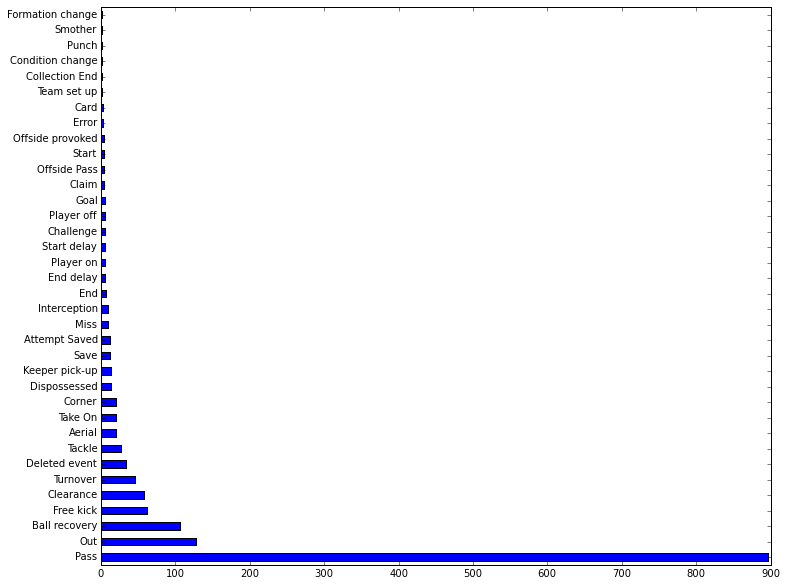

In [66]:
# Let's take a look at the data we have
# Firtst let's look at the distribution of Events
plt.figure()
counting_events = event_merge['name'].value_counts()

counting_events.plot(kind = 'barh', figsize=(12, 10))

# here we can see that, by far, the most common event in the game were passes
# To further analyze the types of passes and their outcomes we can continue digging that variable
# We can also see a numerical representation of the events!

In [67]:
print counting_events

Pass                897
Out                 128
Ball recovery       106
Free kick            62
Clearance            58
Turnover             46
Deleted event        34
Tackle               27
Aerial               20
Take On              20
Corner               20
Dispossessed         14
Keeper pick-up       14
Save                 12
Attempt Saved        12
Miss                 10
Interception         10
End                   7
End delay             6
Player on             6
Start delay           6
Challenge             6
Player off            6
Goal                  5
Claim                 4
Offside Pass          4
Start                 4
Offside provoked      4
Error                 3
Card                  3
Team set up           2
Collection End        2
Condition change      1
Punch                 1
Smother               1
Formation change      1
Name: name, dtype: int64


In [68]:
# Since Pass is the most frequent event (which makes sense for soccer!), let's create a subset to analyze passes in the game

In [69]:
passes_details = game_frame[game_frame.name == 'Pass']
passes_details.head()

,min,sec,event_id,name,q_name,x,y,keypass,assist,team_id,outcome,value,id_x
20,0,2,3,Pass,Zone,49.5,49.7,None,None,810,1,Center,NaN
21,0,2,3,Pass,Pass End Y,49.5,49.7,None,None,810,1,53.2,NaN
22,0,2,3,Pass,Pass End X,49.5,49.7,None,None,810,1,52.8,NaN
26,0,3,4,Pass,Zone,52.8,53.3,None,None,810,1,Back,NaN
27,0,3,4,Pass,Zone,52.8,53.3,None,None,810,1,Back,NaN


In [70]:
# What happens if we analyze the events altogether!

fix = game_frame.ix[434:,['team_id', 'min', 'sec', 'event_id', 'name', 'q_name', 'value', 'x', 'y', 'outcome']]
f1 = fix
f11 = f1[f1['min'].isin(range(3,5))].sort_values(['min', 'sec'], ascending = [True, True])
f11.ix[568:592]

,team_id,min,sec,event_id,name,q_name,value,x,y,outcome
568,810,3,48,48,Ball recovery,Zone,Back,33.7,98.3,1
569,810,3,48,48,Ball recovery,Pass End Y,70.3,33.7,98.3,1
570,810,3,48,48,Ball recovery,Pass End X,34.8,33.7,98.3,1
471,810,3,49,49,Pass,Zone,Back,38.6,98.9,1
472,810,3,49,49,Pass,Zone,Back,38.6,98.9,1
473,810,3,49,49,Pass,Pass End Y,82.8,38.6,98.9,1
474,810,3,49,49,Pass,Pass End Y,90.8,38.6,98.9,1
475,810,3,49,49,Pass,Pass End X,25.4,38.6,98.9,1
476,810,3,49,49,Pass,Pass End X,36.9,38.6,98.9,1
483,810,3,55,50,Pass,Zone,Back,40.3,82.8,1


In [71]:
#a = np.array([[60.5, 86.3],[86.3, 91.0], [91.0,90.1], [90.1,61.5]])
#b = np.array([[90.6, 95.8],[95.8, 94.4], [94.4,39.1], [39.1,46.1]])


In [72]:
fix2 = event_merge.ix[:, ['team_id', 'min', 'sec', 'event_id', 'name', 'q_name', 'value', 'x', 'y', 'outcome']]
f2 = fix2[fix2['min'].isin(range(3,5))]
f11 = f2.sort_values(['min', 'sec'], ascending = [True,True])
len(f11)
lf = []
for i in range(0,len(f11)):
    lf.append(i)
print lf
f11.index = lf
f12 = f11.ix[17:23]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]


In [73]:
a = np.array([[33.7,38.6], [38.6,40.3], [40.3,55.7], [55.7,66.9], [66.9, 78.6], [78.6,95.0], [95.0, 100]])
b = np.array([[98.3, 98.9], [98.9,82.8], [82.8, 90.6], [90.6,45.9], [45.9,5.30], [5.30,50.7], [50.7, 50.7]])

In [75]:
goals = fix2[fix2.name == 'Goal']
goals

,team_id,min,sec,event_id,name,q_name,value,x,y,outcome
1270,810,4,9,54,Goal,NaN,NaN,95.0,50.7,1
1271,2012,42,35,409,Goal,NaN,NaN,89.3,56.6,1
1272,810,54,14,10087,Goal,NaN,NaN,96.9,38.6,1
1273,810,55,44,10094,Goal,NaN,NaN,94.8,55.8,1
1274,810,71,22,10200,Goal,NaN,NaN,99.3,55.0,1


In [76]:
# So following the same method as above, we can get the sequence of events for the second gools for each team! 
second_goal = event_merge.ix[:, ['team_id', 'min', 'sec', 'event_id', 'name', 'q_name', 'value', 'x', 'y', 'outcome']]
second_goal = second_goal[second_goal['min'].isin(range(42,43))]
second_goal = second_goal.sort_values(['min', 'sec'], ascending = [True,True])
second_goal

,team_id,min,sec,event_id,name,q_name,value,x,y,outcome
440,2012,42,1,395,Pass,NaN,NaN,62.6,93.9,0
1203,810,42,2,373,Clearance,NaN,NaN,31.3,4.7,1
1375,2012,42,3,396,Out,NaN,NaN,63.6,100.9,1
1376,810,42,4,374,Out,NaN,NaN,33.2,-1.4,0
441,2012,42,6,397,Pass,NaN,NaN,63.6,100.0,1
442,810,42,8,375,Pass,NaN,NaN,20.5,13.8,1
1030,2012,42,8,398,Turnover,NaN,NaN,71.6,91.8,1
1204,810,42,10,376,Clearance,NaN,NaN,25.1,8.6,0
961,2012,42,14,399,Ball recovery,NaN,NaN,29.5,71.0,1
443,2012,42,15,400,Pass,NaN,NaN,29.5,71.0,1


In [77]:
sg_x = np.array([[29.5,11.3], [11.3,47.9], [47.9, 38.0], [38.0,40.3],
                 [40.3, 69.7], [69.7,70.7], [70.7,90.2], [90.2, 91.9], [91.9,89.3], [89.3, 100.0]])

sg_y = np.array([[71.0,48.5], [48.5,30.7], [30.7, 69.7], [69.7, 49.8],
                 [49.8,51.8], [51.8, 53.7], [53.7, 84.9], [84.9, 83.4], [83.4,56.6], [56.6, 50.0]])

In [84]:
sgx = np.zeros(shape=(10,2))
sgy = np.zeros(shape=(10,2))
for x,i in zip(sg_x,range(0,len(sgx))):
    x = abs(100-x)
    sgx[i] = x


for y,i in zip(sg_y,range(0,len(sgy))):
    y = abs(100-y)
    sgy[i] = y

In [94]:
array_x = []
array_y = []

array_x.append(a)
array_x.append(sgx)
array_y.append(b)
array_y.append(sgy)

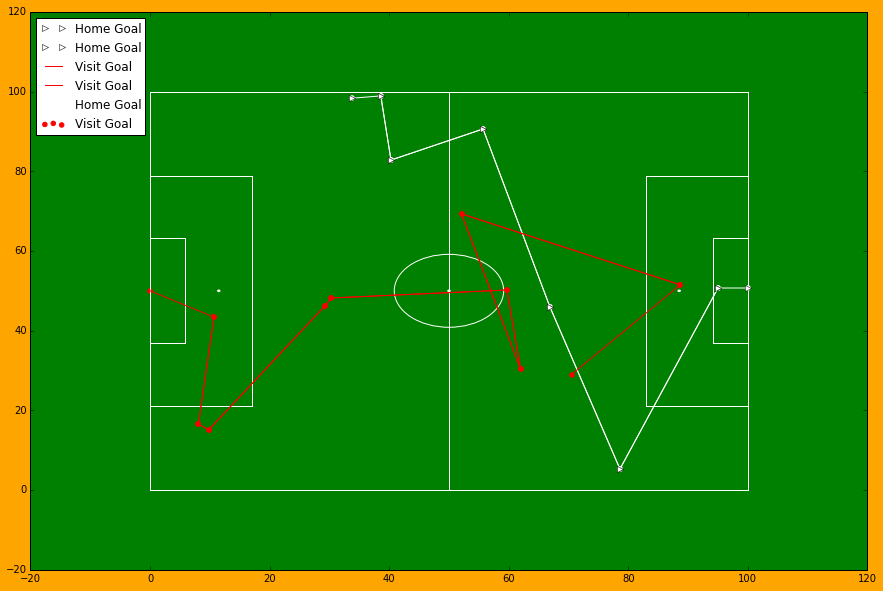

In [108]:
# Now let's plot our sets here!
def soccer_field(array_x, array_y):
    fig = plt.figure(figsize=(15,10),
                    facecolor= 'orange')
    
    circle1=plt.Circle((50,50),.2,color='W')
    circle2=plt.Circle((11.5,50),.2,color='W')
    circle3=plt.Circle((88.5,50),.2,color='W')
    circle4=plt.Circle((50,50),9.15,color='W', fill=False)
    plt.gcf().gca().add_artist(circle1)
    plt.gcf().gca().add_artist(circle2)
    plt.gcf().gca().add_artist(circle3)
    plt.gcf().gca().add_artist(circle4)
    
    field = fig.add_subplot(111)
    # Bandas
    field.set_axis_bgcolor('green')
    field.plot((0, 100), (0,0), color='W')
    field.plot((0, 100), (100,100), color='W')
    field.plot((0, 0), (0,100),color='W')
    field.plot((100,100),(0,100), color = 'W')
    
    # midfield
    field.plot((50,50), (0,100), color='W')
    
    # Areas
    field.plot((0,17),(21.1,21.1), color = 'W')
    field.plot((0,17),(78.9,78.9),color ='W')
    field.plot((17,17),(21.1,78.9), color ='W')
    
    field.plot((0,5.8),(36.8,36.8), color ='W')
    field.plot((0,5.8),(63.2,63.2), color ='W')
    field.plot((5.8,5.8), (36.8,63.2), color ='W')

    field.plot((0,17),(21.1,21.1), color = 'W')
    field.plot((0,17),(78.9,78.9),color ='W')
    field.plot((17,17),(21.1,78.9), color ='W')
    
    field.plot((0,5.8),(36.8,36.8), color ='W')
    field.plot((0,5.8),(63.2,63.2), color ='W')
    field.plot((5.8,5.8), (36.8,63.2), color ='W')
    
    field.plot((83,100),(78.9,78.9), color = 'W')
    field.plot((83,100),(21.1,21.1),color ='W')
    field.plot((83,83),(21.1,78.9), color ='W')
    
    field.plot((94.2,100),(36.8,36.8), color = 'W')
    field.plot((94.2,100),(63.2,63.2),color ='W')
    field.plot((94.2,94.2),(36.8,63.2), color ='W')
    
    
    #field.plot(array1, array2, color = 'b', label = 'Home Team Goal')
    
    event2 = fig.add_subplot(111)
    #event2.plot(sgx, sgy, color = 'r', label = 'Visit Team Goal')
    
    colors = ['W','g','c', 'm','y','k','W']
    event2.plot(array_x[0], array_y[0], color = 'W', label = 'Home Goal', marker = '>')
    event2.scatter(array_x[0], array_y[0], color = 'W', label = 'Home Goal')
    event2.plot(array_x[1], array_y[1], color = 'r', label = 'Visit Goal')
    event2.scatter(array_x[1], array_y[1], color = 'r', label = 'Visit Goal')
        
        
    
    
    field.plot(())

    plt.legend(loc='upper left');
    plt.show()
soccer_field(array_x, array_y)